In [ ]:
# explore telco data

In [1]:
#imports
import warnings
warnings.filterwarnings("ignore")
from env import host, user, password
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import os
import acquire
import prepare
import explore


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics

from math import sqrt
from scipy import stats

In [2]:
#aquire data
df = acquire.get_telco_churn_data()

In [3]:
df.head() #check_yo_head

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [4]:
no_churn = df[df['churn'] == 'No'] # looking at the customers who have not churned

In [5]:
no_churn.churn.count() # count of customers that have not churned

5174

In [6]:
yes_churn = df[df['churn'] == 'Yes'] # looking at the customers who have churned

In [7]:
yes_churn.churn.count() # count of customers who have churned

1869

In [8]:
print('The number of customers that have churned is', yes_churn.churn.count())
print('The number of customers the have remain is', no_churn.churn.count())

The number of customers that have churned is 1869
The number of customers the have remain is 5174


<AxesSubplot:xlabel='churn', ylabel='count'>

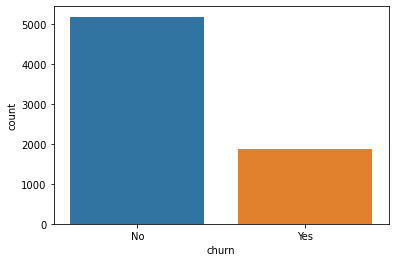

In [9]:
#making a graph to look at churn
sns.countplot(df['churn'])

In [10]:
df.info() # getting the data info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [11]:
df.isnull().sum() # checking for any null values

payment_type_id             0
contract_type_id            0
internet_service_type_id    0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
internet_service_type       0
contract_type               0
payment_type                0
dtype: int64

In [12]:
df.columns.to_list() # making a list of the columns in the telco data

['payment_type_id',
 'contract_type_id',
 'internet_service_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [13]:
df.nunique() # count of unique values for each column

payment_type_id                4
contract_type_id               3
internet_service_type_id       3
customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
paperless_billing              2
monthly_charges             1585
total_charges               6531
churn                          2
internet_service_type          3
contract_type                  3
payment_type                   4
dtype: int64

<AxesSubplot:xlabel='internet_service_type', ylabel='count'>

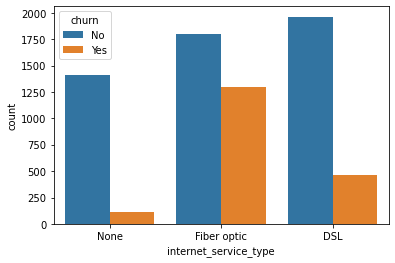

In [14]:
# looking at churn by internet_service_type
sns.countplot(x='internet_service_type', hue='churn', data=df)

In [15]:
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [16]:

# Drop customer_id

df = df.drop(['customer_id','payment_type_id','contract_type_id','internet_service_type_id','online_backup','device_protection','tech_support','streaming_tv','streaming_movies'], axis = 1)

In [17]:
# Drop empty total row charges
df.drop(df[df['total_charges'].str.contains(" ")].index, inplace = True)

In [18]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,Female,0,No,No,3,Yes,No,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,Female,0,Yes,Yes,4,Yes,No,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,Male,0,No,No,27,Yes,No,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,Male,0,No,No,1,Yes,No,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,Female,0,Yes,No,10,Yes,No,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [19]:
df.shape

(7032, 15)

In [21]:
prepare.prep_telco_data(df)

KeyError: "['customer_id'] not found in axis"

In [23]:
prepare.clean_telco(df)

KeyError: "['customer_id'] not found in axis"

In [ ]:
# splitting the data
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [ ]:
# adding 'churn' to the target
train, validate, test = train_validate_test_split(df, target='churn', seed=123)

In [ ]:
# split the data
X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

## Creating my initial hypothesis

### I want to see if churn has a relation to the type of service

null - There is no relation to churn and month to month contracts

hypothesis - this is a relation to churn and month to month contracts

In [ ]:
# define my alpha
alpha = .05

In [ ]:
observed = pd.crosstab(train['churn'], train['contract_type'])
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f"p value is less than alpha:  {p < alpha}")

In [ ]:

# Create model
logit = LogisticRegression(C=1, random_state=123)
# Train model
logit.fit(X_train, y_train)

In [ ]:

def column_list(X_train):
    list = []
    for column in X_train.columns:
        list.append(column)
    return list

column_list(X_train)

In [ ]:

# Feature Importance
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)
